## 非負値行列因子分解(NMF)

PCAと違って、第２成分以降が直交するベクトルではなく、すべてのベクトルが正の方向指す分析ベクトルとなる。
特徴量ごとにまとまりのあるデータに対しての特徴が掴みやすくなる。らしい。

元となる行列に近似する行列Yとなるような行列積XZの、Xの列数を求める次元削減後の特徴量数となるよう計算する
(Xの行数が元の行列の数、Zの列数が元の行列の列数となる)

In [1]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

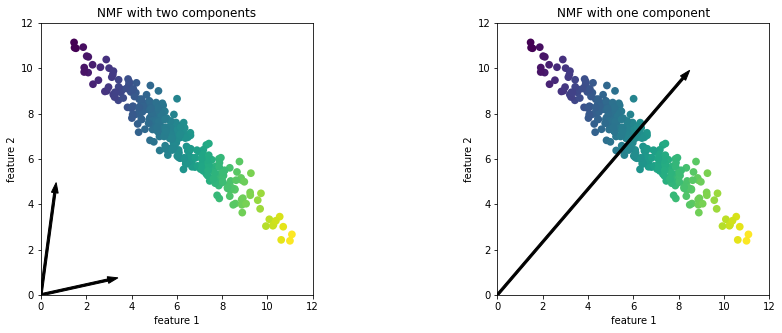

In [2]:
mglearn.plots.plot_nmf_illustration()

In [4]:
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape


# targetの数分のarrayを用意
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    # 各ターゲットの50件までTrueを立てる whereで条件に合うpeopleのindexを取得できる
    mask[np.where(people.target == target)[0][:50]] = 1

# Trueのデータのみ訓練、検証データに使用する
X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people / 255.

from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0
)

________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[0.202614, ..., 0.180392],
       ...,
       [0.203922, ..., 0.113725]], dtype=float32), 
array([[0.65098 , ..., 0.104575],
       ...,
       [0.355556, ..., 0.279739]], dtype=float32))
_____________________________________________________nmf_faces - 720.3s, 12.0min


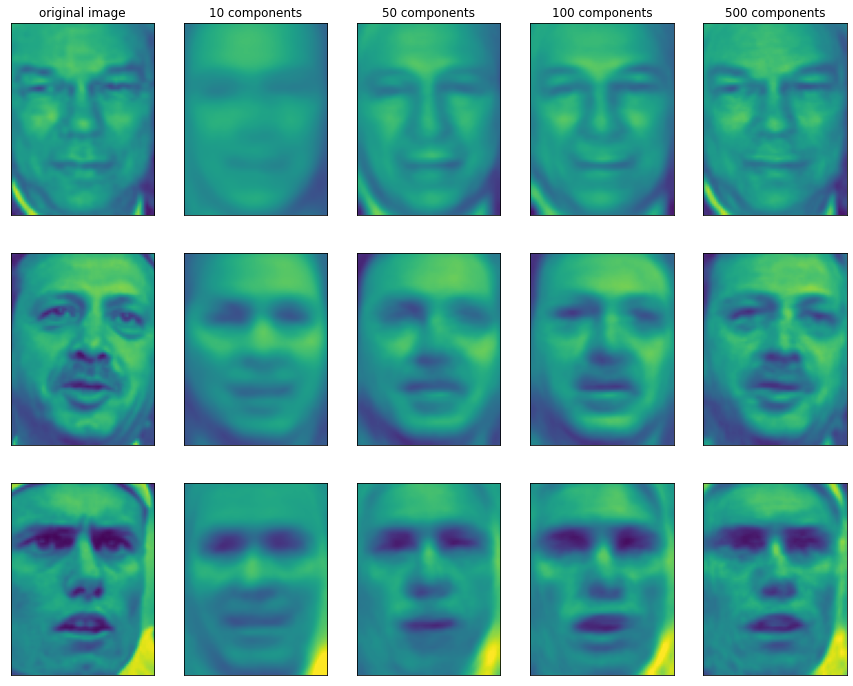

In [5]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

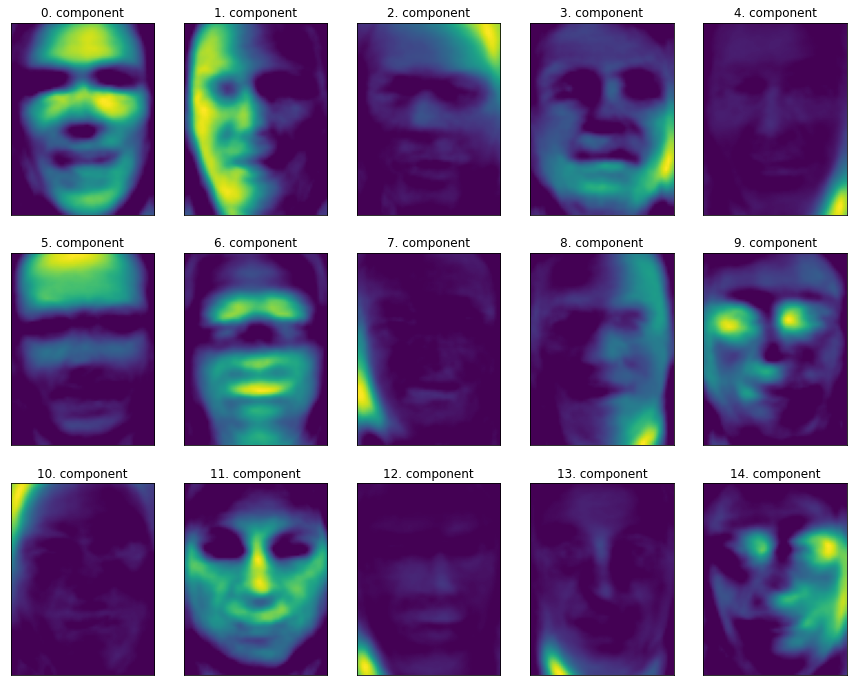

In [7]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fix, axes = plt.subplots(3,5,figsize=(15,12), subplot_kw={"xticks":(), "yticks":()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))

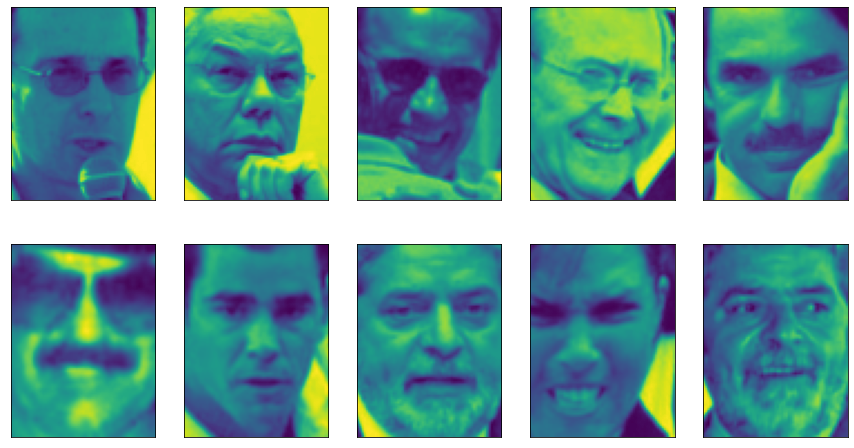

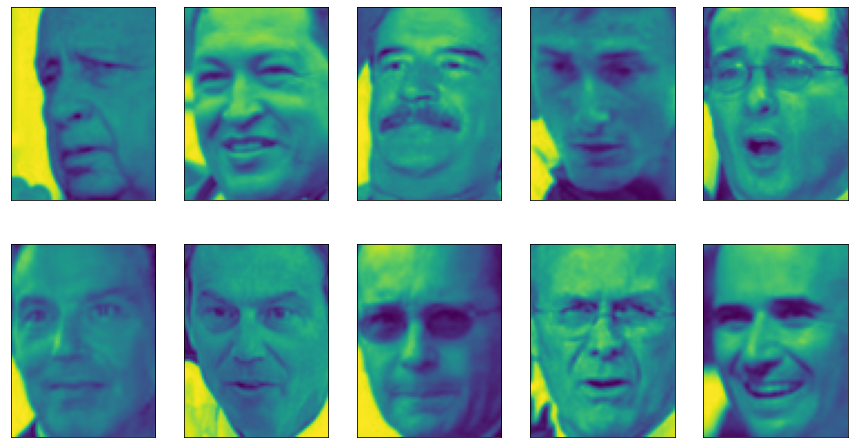

In [18]:
compn = 3
# 3つ目の成分でソート、
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2,5,figsize=(15,8),subplot_kw={"xticks":(), "yticks":()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
    
compn = 7
# 7つ目の成分でソート、
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2,5,figsize=(15,8),subplot_kw={"xticks":(), "yticks":()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
    

Text(0, 0.5, 'Signal')

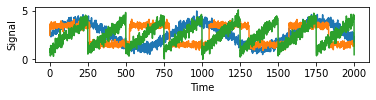

In [21]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6,1))
plt.plot(S,"-")
plt.xlabel("Time")
plt.ylabel("Signal")

In [30]:
# データを混ぜ合わせて100次元の状態を作る
A = np.random.RandomState(0).uniform(size=(100,3))
X = np.dot(S, A.T)
print("Shape of measurements: {}".format(X.shape))

Shape of measurements: (2000, 100)


NMFで次元削減を行う

In [24]:
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print("Recovered signal shape {}".format(S_.shape))

Recovered signal shape (2000, 3)


In [26]:
# 比較の為、PCAでも次元削減
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
H = pca.fit_transform(X)

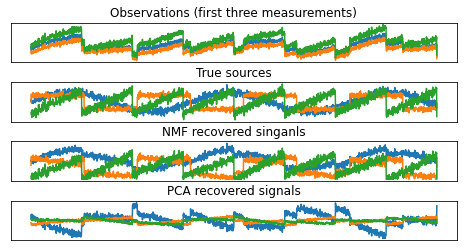

In [28]:
models = [X, S, S_, H]
names = ["Observations (first three measurements)", "True sources", "NMF recovered singanls", "PCA recovered signals" ]

fig, axes = plt.subplots(4, figsize=(8,4), gridspec_kw={"hspace":.5}, subplot_kw={"xticks":(), "yticks":()})
for model, name, ax in zip (models, names, axes):
    ax.set_title(name)
    ax.plot(model[:,:3],"-")